In [1]:
### Daily Gold Price (2015-2021) Time Series

**Content**  <br>
Daily gold prices (2014-01-01 to 2021-12-29)

**Acknowledgements** <br>
Raw Data Source: https://in.investing.com/commodities/gold-mini
This data frame is preprocessed to time series analysis and forecasting

**Inspiration** <br>
Forecast, Predict Prices, Time Series Forecasting

**Note** <br>
Gold Prices in this dataset makes no guarantee or warranty on the accuracy or completeness of the data provided.

In [2]:
##!mkdir ~/.kaggle

In [3]:
##!cp ./kaggle.json ~/.kaggle/

In [4]:
##!chmod 600 ~/.kaggle/kaggle.json

In [5]:
##! pip install kaggle

In [6]:
##!pip install keras-tuner

In [7]:
##! kaggle datasets download -d nisargchodavadiya/daily-gold-price-20152021-time-series

In [8]:
#! unzip ./daily-gold-price-20152021-time-series.zip

In [9]:
#! pip install tensorflow

In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt
tf.random.set_seed(123)
np.random.seed(123)

In [11]:
import pandas as pd
#import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [12]:
df=pd.read_csv('./Gold Price.csv')
df.head(3)

,Date,Price,Open,High,Low,Volume,Chg%
0,2014-01-01,29542,29435,29598,29340,2930,0.25
1,2014-01-02,29975,29678,30050,29678,3140,1.47
2,2014-01-03,29727,30031,30125,29539,3050,-0.83


In [13]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='object')

In [14]:
df.describe()

,Price,Open,High,Low,Volume,Chg%
count,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000
mean,34072.025579,34074.013514,34262.575772,33878.503378,13741.028475,0.026810
std,8205.749351,8209.173030,8267.486025,8133.066425,11487.027573,0.859132
min,24545.000000,24583.000000,24635.000000,24470.000000,0.000000,-5.980000
25%,28427.500000,28412.500000,28530.000000,28263.750000,6677.500000,-0.410000
50%,30423.000000,30399.000000,30547.500000,30267.000000,11595.000000,0.020000
75%,38948.000000,38983.250000,39385.250000,38655.000000,18360.000000,0.460000
max,56117.000000,56351.000000,56499.000000,55400.000000,106920.000000,5.300000


In [15]:
### Check if there is any null values

In [16]:
df.isnull().sum()

Date      0
Price     0
Open      0
High      0
Low       0
Volume    0
Chg%      0
dtype: int64

In [17]:
le = preprocessing.LabelEncoder()

In [18]:
df['Date'] = le.fit_transform(df['Date']) 

In [19]:
df.describe()

,Date,Price,Open,High,Low,Volume,Chg%
count,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000,2072.000000
mean,1035.500000,34072.025579,34074.013514,34262.575772,33878.503378,13741.028475,0.026810
std,598.279199,8205.749351,8209.173030,8267.486025,8133.066425,11487.027573,0.859132
min,0.000000,24545.000000,24583.000000,24635.000000,24470.000000,0.000000,-5.980000
25%,517.750000,28427.500000,28412.500000,28530.000000,28263.750000,6677.500000,-0.410000
50%,1035.500000,30423.000000,30399.000000,30547.500000,30267.000000,11595.000000,0.020000
75%,1553.250000,38948.000000,38983.250000,39385.250000,38655.000000,18360.000000,0.460000
max,2071.000000,56117.000000,56351.000000,56499.000000,55400.000000,106920.000000,5.300000


In [20]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='object')

In [21]:
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon

    for i in range(start, end):
        indices = range(i-window, i)
        X.append(dataset[indices])

        indicey = range(i+1, i+1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y)

In [22]:
validate = df[['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%']].tail(10)

In [23]:
x_scaler = preprocessing.MinMaxScaler()
y_scaler = preprocessing.MinMaxScaler()
dataX = x_scaler.fit_transform(df[['Date', 'Open', 'High', 'Low', 'Volume', 'Chg%']])
dataY = y_scaler.fit_transform(df[['Price']])

In [24]:
hist_window = 48
horizon = 10
TRAIN_SPLIT = 1800
x_train_multi, y_train_multi = custom_ts_multi_data_prep(
    dataX, dataY, 0, TRAIN_SPLIT, hist_window, horizon)
x_val_multi, y_val_multi = custom_ts_multi_data_prep(
    dataX, dataY, TRAIN_SPLIT, None, hist_window, horizon)

In [25]:
print ('Single window of past history')
print(x_train_multi[0])
print ('\n Target horizon')
print (y_train_multi[0])

Single window of past history
[[0.00000000e+00 1.52732309e-01 1.55755712e-01 1.57452312e-01
  2.74036663e-02 5.52304965e-01]
 [4.82858522e-04 1.60381516e-01 1.69940999e-01 1.68380213e-01
  2.93677516e-02 6.60460993e-01]
 [9.65717045e-04 1.71493327e-01 1.72294753e-01 1.63886195e-01
  2.85260007e-02 4.56560284e-01]
 [1.44857557e-03 1.47821707e-01 1.45744414e-01 1.55480116e-01
  0.00000000e+00 3.96276596e-01]
 [1.93143409e-03 1.48482750e-01 1.49384886e-01 1.48108632e-01
  2.28020950e-01 4.81382979e-01]
 [2.41429261e-03 1.43131453e-01 1.43108210e-01 1.43614614e-01
  1.74990647e-01 4.81382979e-01]
 [2.89715113e-03 1.36395115e-01 1.37898569e-01 1.40640155e-01
  1.69659559e-01 5.22163121e-01]
 [3.38000966e-03 1.38724503e-01 1.38651770e-01 1.42095053e-01
  1.41507669e-01 5.49645390e-01]
 [3.86286818e-03 1.39983631e-01 1.43202360e-01 1.45166505e-01
  1.47867565e-01 5.82446809e-01]
 [4.34572670e-03 1.44390582e-01 1.47344966e-01 1.50759780e-01
  1.28881407e-01 5.73581560e-01]
 [4.82858522e-03 1.4

In [26]:
BATCH_SIZE = 256
BUFFER_SIZE = 150

train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

2022-04-13 13:58:53.351388: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64


In [27]:
Bi_lstm_model = tf.keras.models.Sequential([
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(300, return_sequences=True), 
                               input_shape=x_train_multi.shape[-2:]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(300)),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=horizon),
])
Bi_lstm_model.compile(optimizer='adam', loss='mse')

2022-04-13 13:58:53.351436: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-13 13:58:53.351471: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (n8n29btfmg): /proc/driver/nvidia/version does not exist
2022-04-13 13:58:53.362023: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
EVALUATION_INTERVAL = 110
EPOCHS = 3
history = Bi_lstm_model.fit(train_data_multi, epochs=EPOCHS, steps_per_epoch=EVALUATION_INTERVAL, validation_data=val_data_multi, validation_steps=50, verbose=1)
                                   

Epoch 1/3
110/110 [==============================] - 1092s 10s/step - loss: 0.0276 - val_loss: 0.0058
Epoch 2/3
110/110 [==============================] - 1078s 10s/step - loss: 0.0096 - val_loss: 0.0082
Epoch 3/3
110/110 [==============================] - 1087s 10s/step - loss: 0.0080 - val_loss: 0.0027


In [29]:
model_path = r'./time_series.h5'

In [30]:
tf.keras.models.save_model(
    Bi_lstm_model,
    model_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

In [31]:
Trained_model = tf.keras.models.load_model(model_path)

In [32]:
# Show the model architecture
Trained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 48, 600)          736800    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 600)              2162400   
 nal)                                                            
                                                                 
 dense (Dense)               (None, 20)                12020     
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 2,911,430
Trainable params: 2,911,430
Non-

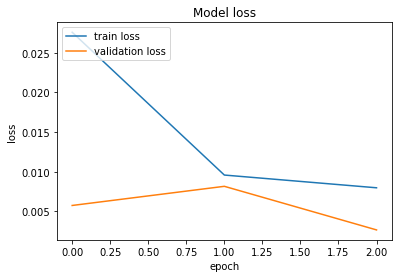

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

In [35]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='object')

In [36]:
data_val = x_scaler.fit_transform(df[['Date', 'Open', 'High', 'Low', 'Volume', 'Chg%']].tail(48))

In [37]:
val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])

In [38]:
from sklearn import metrics
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

### Time Series ForeCasting

In [39]:
df2 = pd.read_csv('./Gold Price.csv')

In [40]:
df2.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='object')

In [44]:
df2.Date.head(2)

0    2014-01-01
1    2014-01-02
Name: Date, dtype: object

In [45]:
df2['Date'] = pd.to_datetime(df2['Date'].astype(str), format='%Y-%m-%d')

In [46]:
df2 = df2[['Date', 'Price']]

In [47]:
# grouping sales according to Order Date
df2.groupby('Date')['Price'].sum().reset_index()

,Date,Price
0,2014-01-01,29542
1,2014-01-02,29975
2,2014-01-03,29727
3,2014-01-04,29279
4,2014-01-06,29119
...,...,...
2067,2021-12-23,48012
2068,2021-12-24,47982
2069,2021-12-27,47933
2070,2021-12-28,47888


In [48]:
# min and max values of Order Date
print(df2['Date'].min())
print(df2['Date'].max())

2014-01-01 00:00:00
2021-12-29 00:00:00


In [49]:
#set 'Date' as index
df2 = df2.set_index('Date')
df2.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-06', '2014-01-07', '2014-01-08', '2014-01-09',
               '2014-01-10', '2014-01-13',
               ...
               '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-27',
               '2021-12-28', '2021-12-29'],
              dtype='datetime64[ns]', name='Date', length=2072, freq=None)

In [50]:
df2.sort_index(inplace=True)
y = df2['Price']

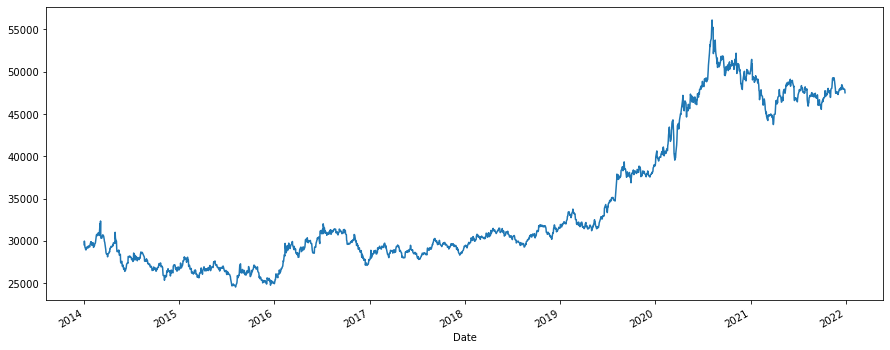

In [51]:
y.plot(figsize = (15, 6))
plt.show()

In [52]:
from pylab import rcParams
import statsmodels.api as sm


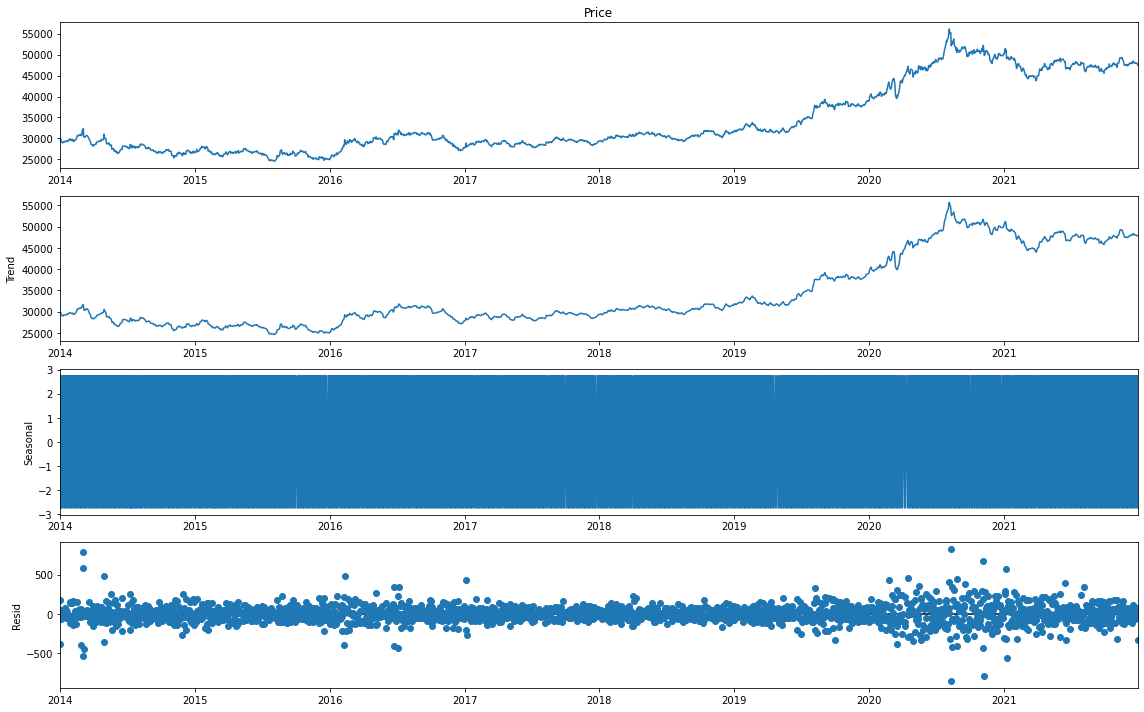

In [53]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 16, 10
decomposition = sm.tsa.seasonal_decompose(y, model='additive', extrapolate_trend='freq', period=2)
fig = decomposition.plot()
plt.show()

In [54]:
df2.columns

Index(['Price'], dtype='object')

### Splitting the data into training and validation part

In [55]:
df3 = pd.read_csv('./Gold Price.csv')

In [56]:
df3.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='object')

In [58]:
df3['Date'] = pd.to_datetime(df3['Date'].astype(str), format='%Y-%m-%d')

In [59]:
#divide data into train and test
train_ind = int(len(df3)*0.8)
train = df[:train_ind]
valid = df[train_ind:]

In [60]:
train.head(2)

,Date,Price,Open,High,Low,Volume,Chg%
0,0,29542,29435,29598,29340,2930,0.25
1,1,29975,29678,30050,29678,3140,1.47


In [61]:
print(train.shape, valid.shape)

(1657, 7) (415, 7)


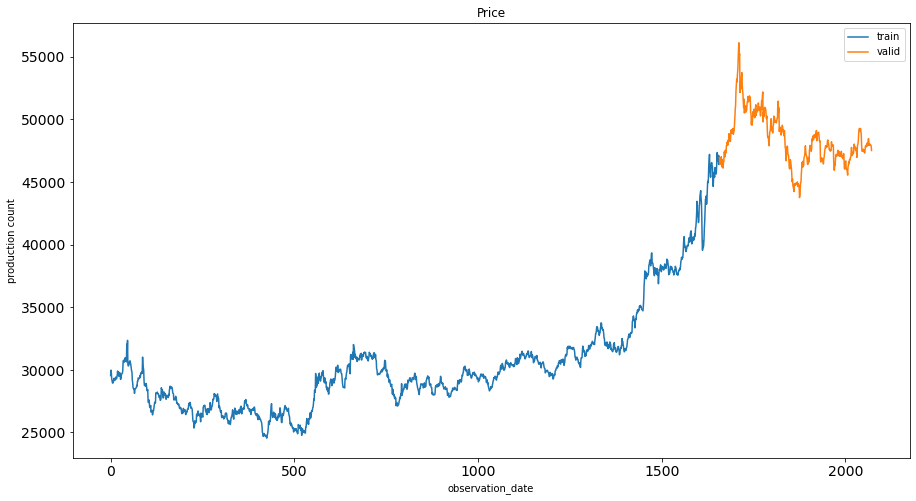

In [62]:
train.Price.plot(figsize=(15,8), title= 'Price', fontsize=14, label='train')
valid.Price.plot(figsize=(15,8), title= 'Price', fontsize=14, label='valid')
plt.xlabel("observation_date")
plt.ylabel("production count")
plt.legend(loc='best')
plt.show()

### Simple models: Naive,Moving Average

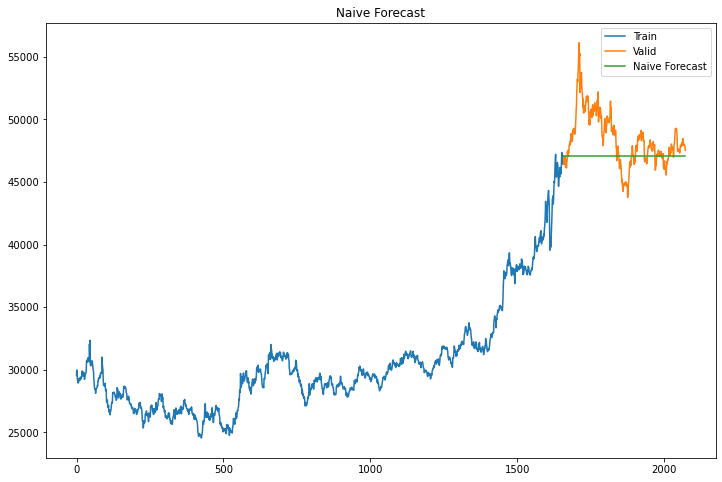

In [63]:
# predictions using naive approach for the validation set.
dd= np.asarray(train['Price'])
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Price'], label='Train')
plt.plot(valid.index,valid['Price'], label='Valid')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [65]:
# RMSE(Root Mean Square Error) to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid['Price'], y_hat.naive))
print(rms)

2466.8205457266804


### Moving Average

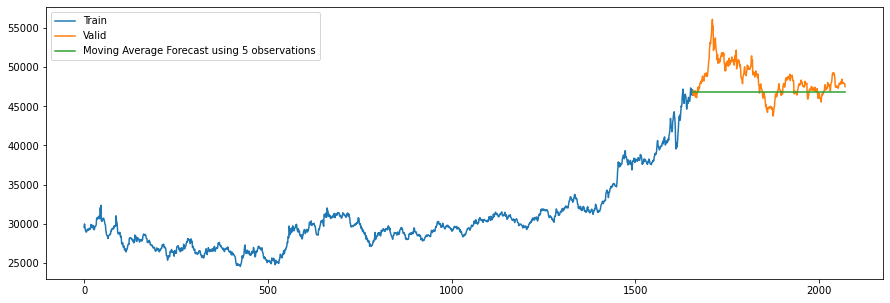

In [66]:
# last 5 observations.
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = train['Price'].rolling(5).mean().iloc[-1] # average of last 5 observations.
plt.figure(figsize=(15,5)) 
plt.plot(train['Price'], label='Train')
plt.plot(valid['Price'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 5 observations')
plt.legend(loc='best')
plt.show()

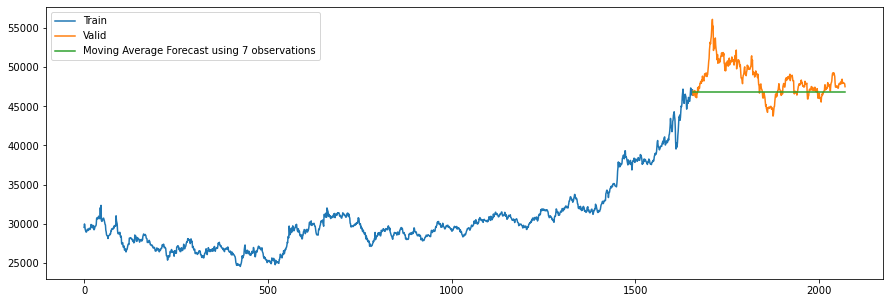

In [67]:
# last 7 observations.
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = train['Price'].rolling(7).mean().iloc[-1] # average of last 7 observations.
plt.figure(figsize=(15,5)) 
plt.plot(train['Price'], label='Train')
plt.plot(valid['Price'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 7 observations')
plt.legend(loc='best')
plt.show()

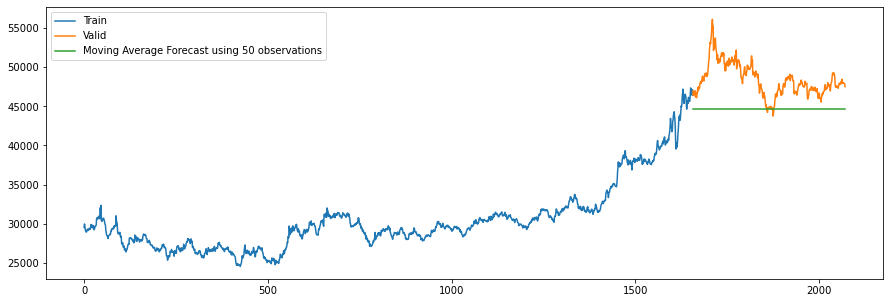

In [68]:
# last 50 observations.
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = train['Price'].rolling(50).mean().iloc[-1] # average of last 50 observations.
plt.figure(figsize=(15,5)) 
plt.plot(train['Price'], label='Train')
plt.plot(valid['Price'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations')
plt.legend(loc='best')
plt.show()

In [70]:
rms = sqrt(mean_squared_error(valid['Price'], y_hat_avg.moving_avg_forecast))
print(rms)

4297.332149514746


Considering validate set, the Moving Average method showed better performance at some important metrics like RMSE and MAPE



### Exponential models: Ses, Holt, Holt Winters

**What is holt winter’s method** <br>
Real-world data like that of demand data in any industry generally has a lot of seasonality and trends. When forecasting demands in such cases requires models which will account for the trend and seasonality in the data as the decision made by the business is going to be based on the result of this model. For such cases, Holt winter’s method is one of the many time series prediction methods which can be used for forecasting.  <br>

**Holt-Winter’s Exponential Smoothing** as named after its two contributors: Charles Holt and Peter Winter’s is one of the oldest time series analysis techniques which takes into account the trend and seasonality while doing the forecasting. This method has 3 major aspects for performing the predictions. It has an average value with the trend and seasonality. The three aspects are 3 types of exponential smoothing and hence the hold winter’s method is also known as triple exponential smoothing.  <br>

**Exponential Smoothing:** Simple exponential smoothing as the name suggest is used for forecasting when the data set has no trends or seasonality.  <br>

**Holt’s Smoothing method:** Holt’s smoothing technique, also known as linear exponential smoothing, is a widely known smoothing model for forecasting data that has a trend.  <br>

**Winter’s Smoothing method:** Winter’s smoothing technique allows us to include seasonality while making the prediction along with the trend.  <br>

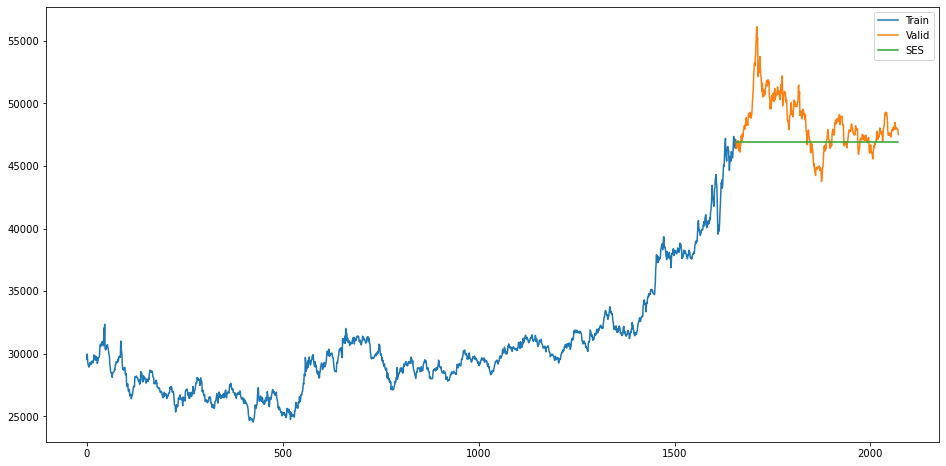

In [71]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_ex = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Price'])).fit(smoothing_level=0.6,optimized=False)
y_hat_ex['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(train['Price'], label='Train')
plt.plot(valid['Price'], label='Valid')
plt.plot(y_hat_ex['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [72]:
rms = sqrt(mean_squared_error(valid['Price'], y_hat_ex['SES']))
print(rms)

2554.0273732760647


### Holt’s Linear Trend Model

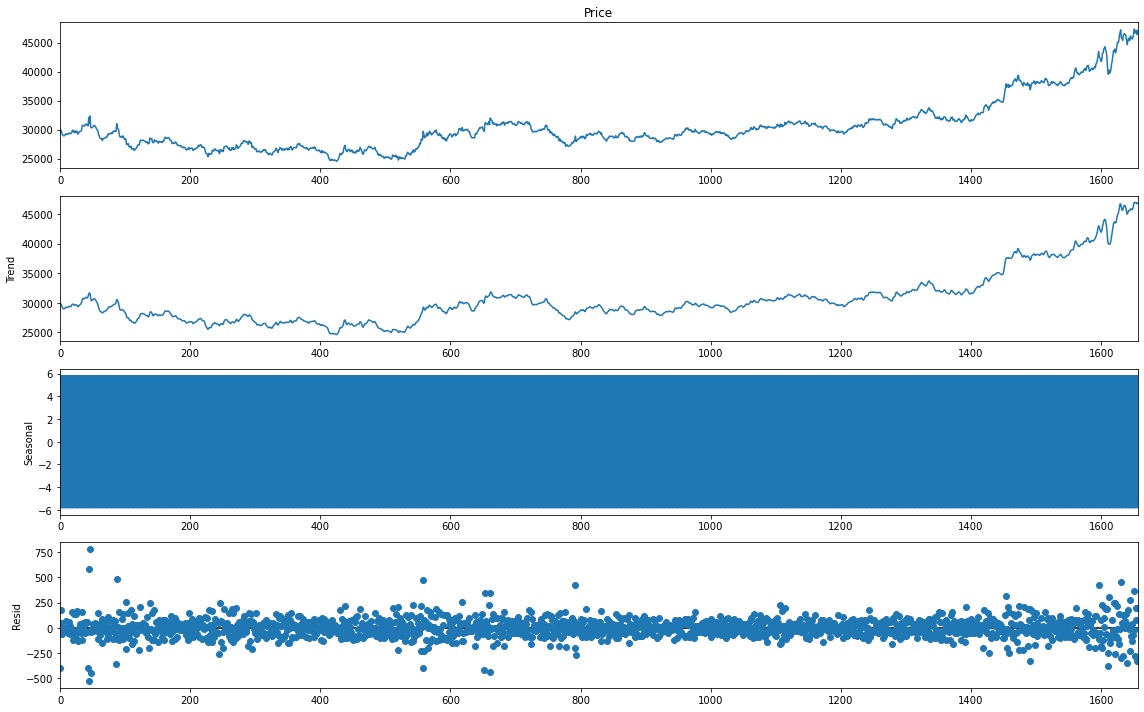

In [73]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(train['Price'], model='additive', extrapolate_trend='freq', period=2).plot()
result = sm.tsa.stattools.adfuller(train['Price'])
plt.show()

/tmp/ipykernel_262/593229442.py:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(np.asarray(train['Price'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)


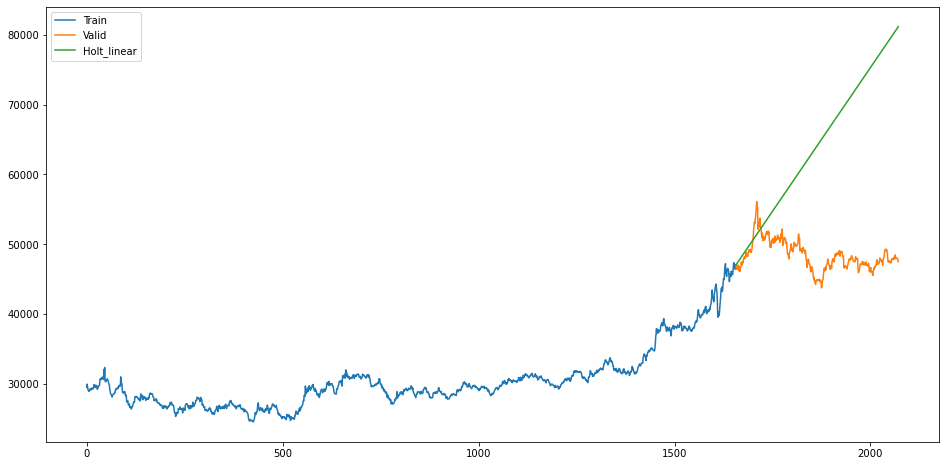

In [74]:
y_hat_ex = valid.copy()

fit1 = Holt(np.asarray(train['Price'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_ex['Holt_linear'] = fit1.forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot(train['Price'], label='Train')
plt.plot(valid['Price'], label='Valid')
plt.plot(y_hat_ex['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [75]:
rms = sqrt(mean_squared_error(valid['Price'], y_hat_ex.Holt_linear))
print(rms)

19188.739136171516


### Holt’s Winter method

/opt/conda/envs/rapids/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


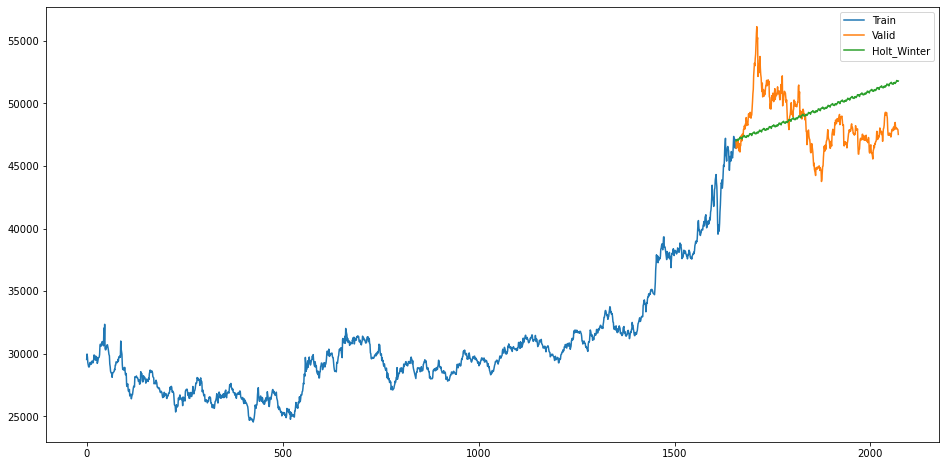

In [76]:
y_hat_win = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Price']) ,seasonal_periods=25 ,trend='add', seasonal='add',).fit()
y_hat_win['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot( train['Price'], label='Train')
plt.plot(valid['Price'], label='Valid')
plt.plot(y_hat_win['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [77]:
valid['Price']

1657    46953
1658    46393
1659    46647
1660    46474
1661    46858
        ...  
2067    48012
2068    47982
2069    47933
2070    47888
2071    47515
Name: Price, Length: 415, dtype: int64

In [78]:
rms = sqrt(mean_squared_error(valid['Price'], y_hat_win.Holt_Winter))
print(rms)

3151.5959635192194


**Dickey-Fuller TEST**  <br>
ADF (Augmented Dickey-Fuller) test is a statistical significance test which means the test will give results in hypothesis tests with null and alternative hypotheses. As a result, we will have a p-value from which we will need to make inferences about the time series, whether it is stationary or not.

In [79]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(24).mean()
    rolstd = timeseries.rolling(24).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [80]:
df4=pd.read_csv('./Gold Price.csv')
df4.head(3)

,Date,Price,Open,High,Low,Volume,Chg%
0,2014-01-01,29542,29435,29598,29340,2930,0.25
1,2014-01-02,29975,29678,30050,29678,3140,1.47
2,2014-01-03,29727,30031,30125,29539,3050,-0.83


In [82]:
df4['Date'] = pd.to_datetime(df4['Date'].astype(str), format='%Y-%m-%d')

In [83]:
df4.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='object')

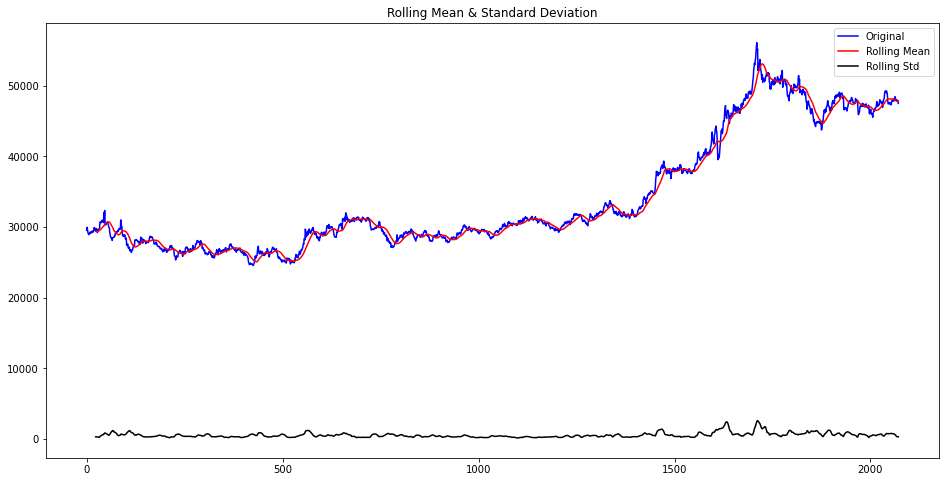

Results of Dickey-Fuller Test:
Test Statistic                   -0.052063
p-value                           0.954009
#Lags Used                       14.000000
Number of Observations Used    2057.000000
Critical Value (1%)              -3.433533
Critical Value (5%)              -2.862946
Critical Value (10%)             -2.567519
dtype: float64


In [84]:
plt.figure(figsize=(16,8))
test_stationarity(df4['Price'])

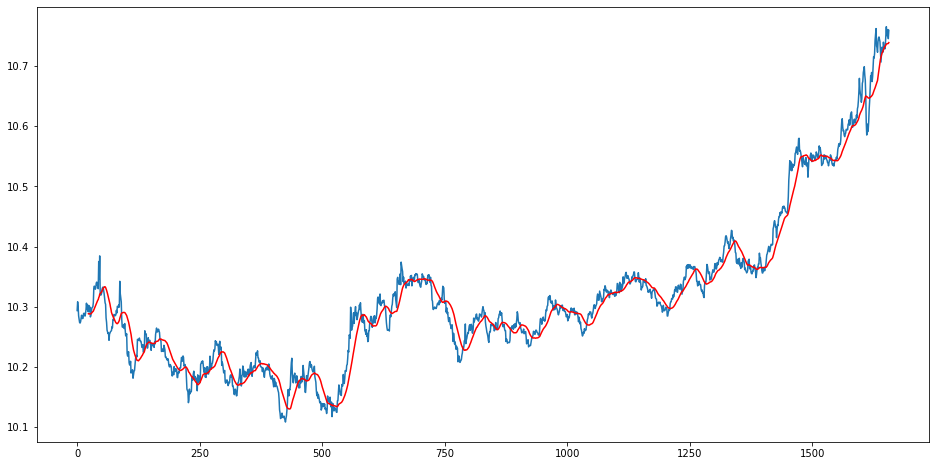

In [85]:
train_log = np.log(train['Price'])
valid_log = np.log(valid['Price'])

moving_avg = train_log.rolling(24).mean()
plt.figure(figsize=(16,8))
plt.plot(train_log)
plt.plot(moving_avg, color = 'red')
plt.show()

In [86]:
train_log_moving_avg_diff = train_log - moving_avg

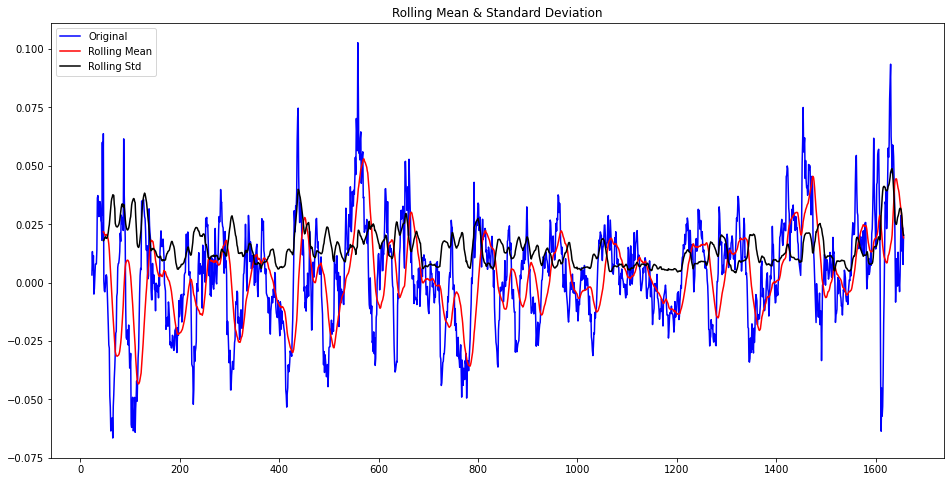

Results of Dickey-Fuller Test:
Test Statistic                -9.163679e+00
p-value                        2.493655e-15
#Lags Used                     1.200000e+01
Number of Observations Used    1.621000e+03
Critical Value (1%)           -3.434391e+00
Critical Value (5%)           -2.863325e+00
Critical Value (10%)          -2.567720e+00
dtype: float64


In [87]:
train_log_moving_avg_diff.dropna(inplace = True)
plt.figure(figsize=(16,8))
test_stationarity(train_log_moving_avg_diff)

In [88]:
from statsmodels.tsa.stattools import adfuller

In [89]:
test_result=adfuller(df4['Price'])

**Stationay And Non-Stationary Time Series Data**  <br>

A stationary time series has statistical properties or moments (e.g., mean and variance) that do not vary in time. Stationarity, then, is the status of a stationary time series. Conversely, nonstationarity is the status of a time series whose statistical properties are changing through time.

**Dickey-Fuller Test To check If the Time Series Data Is Stationary Or Non- Stationary**

In [90]:
#HYPOTHESIS TEST:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Price):
    
    result=adfuller(Price)
    
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [91]:
adfuller_test(df4['Price'])

ADF Test Statistic : -0.052063206205523994
p-value : 0.954008806001703
#Lags Used : 14
Number of Observations Used : 2057
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


**AUTO-CORRELATION | PARTIAL AUTO-CORRELATION:**  <br>
Just as correlation measures the extent of a linear relationship between two variables, autocorrelation measures the linear relationship between lagged values of a time series. <br>

There are several autocorrelation coefficients, corresponding to each panel in the lag plot. <br?

In [92]:
pd.DataFrame(train_log).isnull().sum()

Price    0
dtype: int64

In [93]:
pd.DataFrame(train_log).Price.values

array([10.29356826, 10.30811898, 10.299811  , ..., 10.7606438 ,
       10.74542105, 10.75911491])

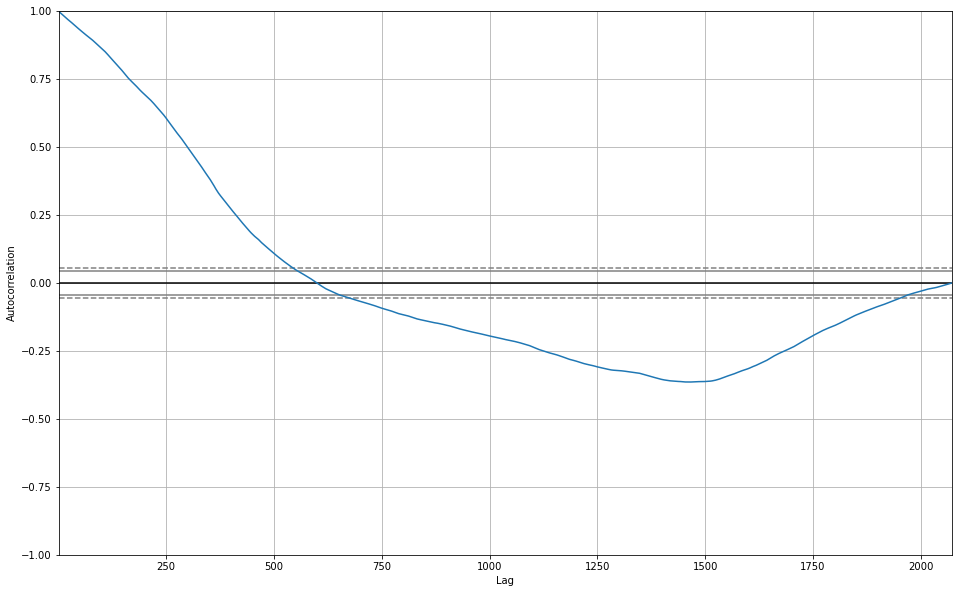

In [94]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df4['Price'])
plt.show()

Here these two graphs will help you to find the p and q values. Partial AutoCorrelation Graph is for the** p-value**. AutoCorrelation Graph for the q-value.  <br>

**ARIMA MODEL**  <br>
Let’s Break it Down:-  <br>

AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.  <br>

I: Integrated. The use of differencing of raw observations in order to make the time series stationary.
MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. <br>
The parameters of the ARIMA model are defined as follows: <br>
p: The number of lag observations included in the model, also called the lag order. <br>
d: The number of times that the raw observations are differenced, also called the degree of differencing. <br>
q: The size of the moving average window, also called the order of moving average.  <br>

In [95]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [96]:
train.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%'], dtype='object')

In [97]:
model=sm.tsa.arima.ARIMA(train['Price'],order=(1,1,2))
model_fit=model.fit()

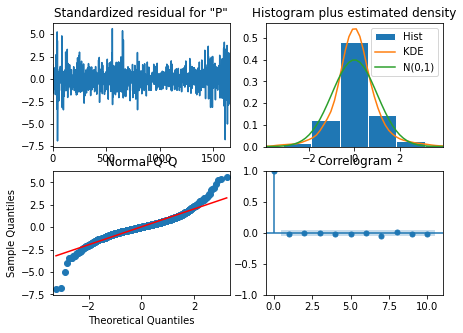

In [98]:
model_fit.plot_diagnostics(figsize=(7,5))
plt.show()

In [99]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 1657
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -11614.737
Date:                Wed, 13 Apr 2022   AIC                          23237.475
Time:                        15:01:53   BIC                          23259.124
Sample:                             0   HQIC                         23245.500
                               - 1657                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3379      0.269     -1.258      0.208      -0.864       0.189
ma.L1          0.3402      0.273      1.247      0.212      -0.194       0.875
ma.L2          0.0529      0.017      3.118      0.002       0.020       0.086
sigma2      7.238e+04   1302.966     55.547      0.000    6.98e+04    7.49e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):              2544.43
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

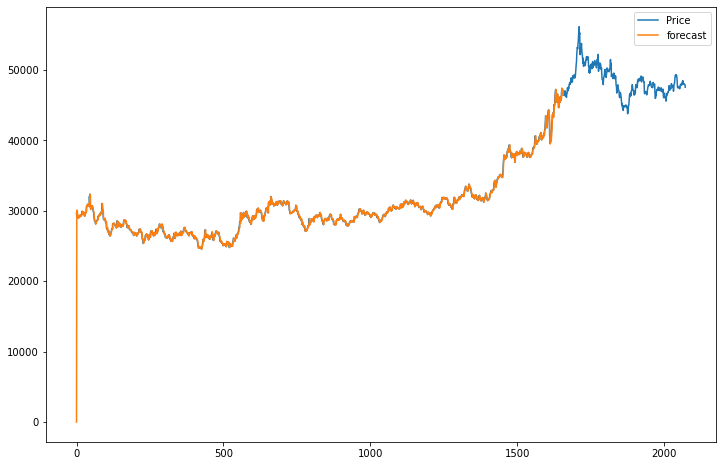

In [100]:
n_periods = 24
df4['forecast']=model_fit.predict(n_periods=n_periods, return_conf_int=True)
df4[['Price','forecast']].plot(figsize=(12,8))

In [101]:
df4[['Price','forecast']].head(4)

,Price,forecast
0,29542,0.000000
1,29975,29544.757643
2,29727,30080.090126
3,29279,29713.691741


The difference between **ARIMA** and **SARIMA (SARIMAX)** is about the seasonality of the dataset. if your data is seasonal, like it happen after a certain period of time. then we will use SARIMA.

**SARIMAX MODEL**

**SARIMAX(Seasonal Auto-Regressive Integrated Moving Average** with eXogenous factors) is an updated version of the ARIMA model. we can say SARIMAX is a seasonal equivalent model like **SARIMA** and **Auto ARIMA**. it can also deal with external effects. This feature of the model differs from other models.

Please Note : Sarimax Consumes Large Memory to Execute. Here, Few parameters can be optimized and tried to make it working.

For Example
Use, model.fit(low_memory=True)

In [102]:
import statsmodels.api as sm

In [103]:
model=sm.tsa.statespace.SARIMAX(train['Price'],order=(1, 1, 1),seasonal_order=(1,1,1,12),enforce_invertibility=False)

In [104]:
results=model.fit(low_memory=True)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.08667D+00    |proj g|=  1.20511D-01


 This problem is unconstrained.



At iterate    5    f=  7.07064D+00    |proj g|=  1.75175D-02

At iterate   10    f=  7.07047D+00    |proj g|=  4.00640D-03

At iterate   15    f=  7.06233D+00    |proj g|=  1.12056D-01

At iterate   20    f=  7.05016D+00    |proj g|=  5.55649D-02

At iterate   25    f=  7.00267D+00    |proj g|=  2.82873D-01

At iterate   30    f=  6.98596D+00    |proj g|=  1.44263D-02

At iterate   35    f=  6.98593D+00    |proj g|=  1.69201D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     54      1     0     0   6.122D-05   6.986D+00
  F =   6.9859333349764139     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

In [105]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                 1657
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -11575.692
Date:                            Wed, 13 Apr 2022   AIC                          23161.383
Time:                                    15:02:43   BIC                          23188.408
Sample:                                         0   HQIC                         23171.404
                                           - 1657                                         
Covariance Type:                           approx                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9901      0.018    -54.372      0.000      -1.026      -0.954
ma.L1          0.9929      0.017     57.790      0.000       0.959       1.027
ar.S.L12       0.0783      0.025      3.101      0.002       0.029       0.128
ma.S.L12      -0.9935      0.017    -58.107      0.000      -1.027      -0.960
sigma2      7.124e+04   2598.639     27.413      0.000    6.61e+04    7.63e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1692.19
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                            -0.05
Prob(H) (two-sided):                  0.10   Kurtosis:                         7.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

<AxesSubplot:>

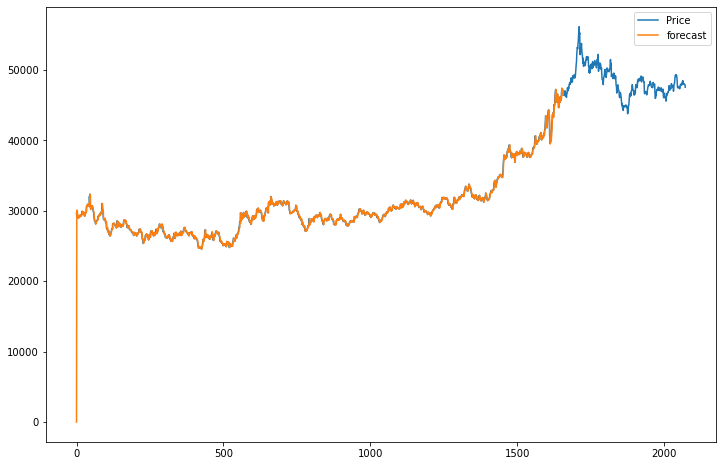

In [106]:
df4['forecast']=model_fit.predict(n_periods=n_periods, return_conf_int=True)
df4[['Price','forecast']].plot(figsize=(12,8))

**PREDICT FOR FUTURE DATASET:**

In [107]:
df4.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Chg%', 'forecast'], dtype='object')

In [108]:
from pandas.tseries.offsets import DateOffset

#Here USING FOR LOOP we are adding some additional data for prediction purpose:

future_dates=[df4.iloc[-1]["Date"] + DateOffset(months=x)for x in range(0,24)]

In [109]:
#Convert that list into DATAFRAME:

future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df4.columns)

In [110]:
#CONCATE THE ORIGINAL AND THE NEWLY CREATED DATASET FOR VISUALIZATION PURPOSE:
future_df=pd.concat([df4,future_datest_df])

<AxesSubplot:>

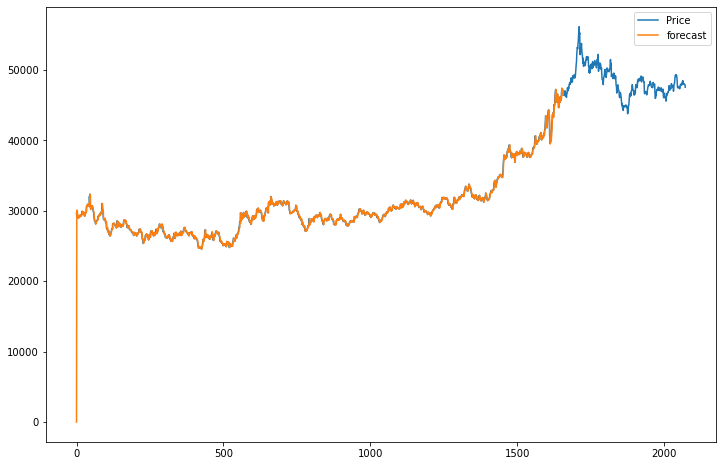

In [111]:
#PREDICT
future_df['forecast'] = model_fit.predict(n_periods=n_periods, return_conf_int=True)  
future_df[['Price', 'forecast']].plot(figsize=(12, 8))
#model_fit.predict(start=100000,end=201008,dynamic=True)

In [112]:
future_df.head(9)

,Date,Price,Open,High,Low,Volume,Chg%,forecast
0,2014-01-01,29542,29435,29598,29340,2930,0.25,0.000000
1,2014-01-02,29975,29678,30050,29678,3140,1.47,29544.757643
2,2014-01-03,29727,30031,30125,29539,3050,-0.83,30080.090126
3,2014-01-04,29279,29279,29279,29279,0,-1.51,29713.691741
4,2014-01-06,29119,29300,29395,29051,24380,-0.55,29263.900382
5,2014-01-07,28959,29130,29195,28912,18710,-0.55,29100.785438
6,2014-01-08,28934,28916,29029,28820,18140,-0.09,28957.165052
7,2014-01-09,28997,28990,29053,28865,15130,0.22,28927.067773
8,2014-01-10,29169,29030,29198,28960,15810,0.59,28998.278034
